In [1]:
## Data preparation

import json
import numpy as np

with open('materials.json', 'rb') as f:
    data = json.load(f)


## Delete the duplicate compounds
to_be_del_index = []
duplicate_compounds = [];
for i in range(0,len(data)):
    for j in range(i+1,len(data)):
        if data[i]['name']==data[j]['name']:
            duplicate_compounds.append(str(data[j]['name']))
            to_be_del_index.append(j)

index = list(set(to_be_del_index))  
data = np.delete(data,index)

In [22]:
## Reshape the data
X = []
Name = []
for i in range(0,len(data)):
    freq = []
    for j in ['Gamma','X','M','R']:
        freq = freq + data[i]['phonon'][j]['freq']
    X.append(freq)
    Name.append(str(data[i]['name']))

X = np.array(X)
X.shape

(168, 60)

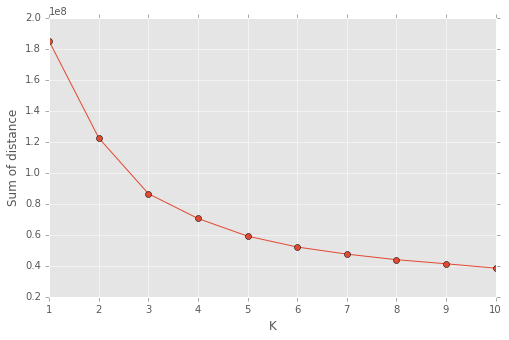

In [33]:
## Optimized hyperparameter
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
plt.style.use('ggplot')

x = [i+1 for i in range(10)]
sum_distance = []

for K in x:
    kmeans = KMeans(n_clusters=K).fit(X)
    sum_distance.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.xlabel('K')
plt.ylabel('Sum of distance')
plt.plot(x, sum_distance, 'o', linestyle='-')

In [44]:
## 2 clustering model
K = 2
kmeans = KMeans(n_clusters=K).fit(X)
labels = kmeans.labels_

In [50]:
## Filter the fake group

all_sorted_clusters = []
all_clusters = []
all_index = []
for i in range(K):
    each_cluster = []
    each_index = []
    for j in range(len(Name)):
        if i == labels[j]:
            each_cluster.append(Name[j])
            each_index.append(j)
    all_index.append(each_index)
    all_clusters.append(each_cluster)
    all_sorted_clusters.append(sorted(each_cluster))
print 'Group 1, Real compounds\n', np.array(all_clusters)[0], '\n\n', 'Group 2, Fake compounds\n', np.array(all_clusters)[1]

Group 1, Real compounds
['AgTaO3', 'SbScO3', 'LaScO3', 'BaSnO3', 'LaAlO3', 'SnZrO3', 'SbGaO3', 'SrSnO3', 'BaSiO3', 'LaGaO3', 'PbSnO3', 'BiInO3', 'RbTaO3', 'YInO3', 'CsNbO3', 'YScO3', 'CaTiO3', 'CaSnO3', 'YAlO3', 'PbHfO3', 'LiTaO3', 'SrZrO3', 'CaHfO3', 'RbNbO3', 'PbZrO3', 'YGaO3', 'NaTaO3', 'LuGaO3', 'CsTaO3', 'SnTiO3', 'SrSiO3', 'SbInO3', 'SrHfO3', 'BiAlO3', 'AgNbO3', 'LiOsO3', 'BiScO3', 'NaNbO3', 'CaZrO3', 'LuScO3', 'BaHfO3', 'LiNbO3', 'PbTiO3', 'MgTiO3', 'BiGaO3', 'PbSiO3', 'SnSiO3', 'BaTiO3', 'BaZrO3', 'SnHfO3', 'ScAlO3', 'LaInO3', 'KTaO3', 'KNbO3', 'SrTiO3', 'CaSiO3', 'TbScO3', 'TbGaO3', 'LuInO3', 'DyTiO3', 'TbTiO3', 'LaTiO3', 'BiTiO3', 'YTiO3', 'InTiO3', 'SmTiO3', 'GaTiO3', 'InFeO3', 'YFeO3', 'LaFeO3', 'TlFeO3', 'CaFeO3', 'GaMnO3', 'BaMnO3', 'SrMnO3', 'CaMnO3', 'InMnO3', 'CsVO3', 'RbWO3', 'CaAlO3', 'BaYO3', 'BaAlO3', 'BaGaO3', 'SrAlO3', 'PbAlO3', 'BaNbO3', 'ErAlO3', 'TbAlO3', 'EuAlO3', 'NdAlO3', 'SmAlO3', 'YbAlO3', 'DyAlO3', 'TmAlO3', 'HoAlO3', 'PmAlO3', 'GdAlO3', 'LaBO3', 'ZnTiO3

In [54]:
## Visulization

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
from sklearn.decomposition import PCA

KK = 2
reduced_data = PCA(n_components=2).fit_transform(X)
clustering = KMeans(n_clusters=KK).fit(reduced_data)
labels = clustering.labels_

plt_data = []
color = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 360, KK+1)]
for i in range(KK):
    cluster = []
    trace = []
    name = []
    for j in range(len(labels)):
        if labels[j] == i:
            cluster.append(j)
            name.append(Name[j])
        trace = go.Scatter(
        x = reduced_data[:,0][cluster],
        y = reduced_data[:,1][cluster],
        name = 'Cluster_'+str(i+1),
        text = name,
        mode = 'markers',
        hoverinfo = 'text',
        marker = dict(
            size = 12,
            opacity= 0.7,
            color = color[i])
    )
    plt_data.append(trace)


layout = dict(yaxis = dict(zeroline = False),
              xaxis = dict(zeroline = False))

fig = dict(data=plt_data, layout=layout)
iplot(fig, filename='styled-scatter')

In [53]:
## Visulization

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

XX = np.delete(X, all_index[1], 0)
KK = 4
reduced_data = PCA(n_components=2).fit_transform(XX)
clustering = KMeans(n_clusters=KK).fit(reduced_data)
labels = clustering.labels_

all_sorted_clusters = []
all_clusters = []
all_index = []
for i in range(KK):
    each_cluster = []
    each_index = []
    for j in range(len(labels)):
        if i == labels[j]:
            each_cluster.append(Name[j])
            each_index.append(j)
    all_index.append(each_index)
    all_clusters.append(each_cluster)
    all_sorted_clusters.append(sorted(each_cluster))
print np.array(all_sorted_clusters)

plt_data = []
color = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 360, KK+1)]
for i in range(KK):
    cluster = []
    trace = []
    name = []
    for j in range(len(labels)):
        if labels[j] == i:
            cluster.append(j)
            name.append(Name[j])
        trace = go.Scatter(
        x = reduced_data[:,0][cluster],
        y = reduced_data[:,1][cluster],
        name = 'Cluster_'+str(i+1),
        text = name,
        mode = 'markers',
        hoverinfo = 'text',
        marker = dict(
            size = 12,
            opacity= 0.7,
            color = color[i])
    )
    plt_data.append(trace)


layout = dict(yaxis = dict(zeroline = False),
              xaxis = dict(zeroline = False)
             )

fig = dict(data=plt_data, layout=layout)
iplot(fig, filename='styled-scatter')

[ ['AgNbO3', 'BaCO3', 'BaMnO3', 'BaNbO3', 'BiGaO3', 'BiInO3', 'BiScO3', 'CaFeO3', 'CaHfO3', 'CaSnO3', 'CaZrO3', 'CsAuBr3', 'CsAuI3', 'CsBeF3', 'CsMgF3', 'CsPO3', 'CsSnF3', 'CsTeO3', 'DyAlO3', 'ErAlO3', 'GdAlO3', 'GdNiO3', 'HoAlO3', 'InFeO3', 'InNiO3', 'KAuBr3', 'KAuF3', 'LaInO3', 'LaScO3', 'LaTiO3', 'LiNbO3', 'LiOsO3', 'LiSbO3', 'LiTaO3', 'LuGaO3', 'LuNiO3', 'LuScO3', 'MgTiO3', 'NdAlO3', 'PbHfO3', 'PbSnO3', 'PbZrO3', 'PmAlO3', 'RbPbF3', 'SbGaO3', 'SbInO3', 'SbScO3', 'ScNiO3', 'SnHfO3', 'SnZrO3', 'SrBiO3', 'TbGaO3', 'TbScO3', 'TbTiO3', 'YFeO3', 'YGaO3', 'YInO3', 'YNiO3', 'YScO3', 'YTiO3', 'YbAlO3', 'ZnTiO3']
 ['AgSbO3', 'CdTiO3', 'CsAuF3', 'CsSeO3', 'GaMnO3', 'InMnO3', 'KAuCl3', 'KAuI3', 'KCuF3', 'KSbO3', 'KTlCl3', 'LaBO3', 'LaFeO3', 'LaNiO3', 'LaPbO3', 'PbAlO3', 'RbAuF3', 'TbAlO3', 'TlFeO3']
 ['BaAlO3', 'BaGaO3', 'BaYO3', 'BiAlO3', 'CaAlO3', 'CaSiO3', 'CsAuCl3', 'CsVO3', 'DyTiO3', 'EuAlO3', 'GaTiO3', 'LaAlO3', 'LuInO3', 'RbAlCl3', 'RbAuCl3', 'RbWO3', 'ScAlO3', 'SrAlO3', 'SrSbO3', 'SrSn